# Принятие решений в бизнесе

**Задача:**
- Приоритизировать 9 гипотез, запустить A/B-тест и проанализировать его результаты.

 **Структура проекта:**
- Часть 1. Приоритизация гипотез.
- Часть 2. Анализ A/B-теста.

**Данные:** 
- Данные для первой части: Файл **/datasets/hypothesis.csv**.
- Данные для второй части: Файлы **/datasets/orders.csv** и **/datasets/visitors.csv**.

**Структура /datasets/hypothesis.csv:**
- **Hypothesis** — краткое описание гипотезы;
- **Reach** — охват пользователей по 10-балльной шкале;
- **Impact** — влияние на пользователей по 10-балльной шкале;
- **Confidence** — уверенность в гипотезе по 10-балльной шкале;
- **Efforts** — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение **Efforts**, тем дороже проверка гипотезы.

**Структура /datasets/orders.csv:**
- **transactionId** — идентификатор заказа;
- **visitorId** — идентификатор пользователя, совершившего заказ;
- **date** — дата, когда был совершён заказ;
- **revenue** — выручка заказа;
- **group** — группа A/B-теста, в которую попал заказ.

**Структура /datasets/visitors.csv:**
- **date** — дата;
- **group** — группа A/B-теста;
- **visitors** —  количество пользователей в указанную дату в указанной группе A/B-теста.


**Ход исследования:**
- Обзор и предобработка данных;
- Приоритезация гипотез;
- Анализ А/В-теста;
- Выводы и выбор варианта решения.


# Обзор  данных

In [145]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import math
from scipy import stats as st
from datetime import datetime, timedelta

In [146]:
# чтение файлов с данными и сохранение в df

try:
    hypothesis, orders, visitors = (
        pd.read_csv('/datasets/hypothesis.csv'),
        pd.read_csv('/datasets/orders.csv'),
        pd.read_csv('/datasets/visitors.csv')
    )


except:
    hypothesis, orders, visitors = (
        pd.read_csv('hypothesis.csv'),
        pd.read_csv('orders.csv'),
        pd.read_csv('visitors.csv')
    )

Изучим общую информацию о данных.

In [147]:
# обзор датафрейма hypothesis

# чтобы было удобно читать формулировки гипотез, уберем ограничение на ширину столбцов
pd.set_option('display.max_colwidth', None)

hypothesis.info()
hypothesis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [148]:
# обзор датафрейма orders

orders.info()
orders.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [149]:
# обзор датафрейма visitors

visitors.info()
visitors.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


На первый взгляд, серьезных проблем с данными нет. Нужно будет проверить их на дубликаты, привести названия столбцов к хорошему стилю и преобразовать данные со временем.

# Предобработка данных

In [150]:
# проверка таблиц на наличие дубликатов

display(hypothesis.duplicated().sum())
display(orders.duplicated().sum())
display(visitors.duplicated().sum())

0

0

0

In [151]:
# приведение наименования столбцов к хорошему стилю

hypothesis.columns = [name.lower() for name in hypothesis.columns]
orders.columns = [name.replace('Id', '_id') for name in orders.columns]

display(hypothesis.columns)
display(orders.columns)

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

In [152]:
# изменим тип данных для столбцов с датами

visitors['date'] = pd.to_datetime(visitors['date'])
orders['date'] = pd.to_datetime(orders['date'])

visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [153]:
# проверка таблицы с заказами на наличие неявных убликатов
orders['transaction_id'].value_counts()  

1658608862    1
2211880073    1
3913205113    1
437656952     1
3592105335    1
             ..
2872509092    1
2013919907    1
3154167297    1
2960804513    1
4281129020    1
Name: transaction_id, Length: 1197, dtype: int64

Теперь проведем некоторые дополнительные исследования:

In [154]:
# узнаем сколько групп в AB тесте 
visitors['group'].unique()  

array(['A', 'B'], dtype=object)

В тесте 2 группы. Узнаем даты начала и окончания теста.

In [155]:
display(visitors['date'].min())
display(visitors['date'].max())
display(visitors['date'].max()-visitors['date'].min())       

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

Timedelta('30 days 00:00:00')

Судя по всему, на момент анализа тест длится уже месяц.

In [156]:
orders.groupby('group')['visitor_id'].count()

group
A    557
B    640
Name: visitor_id, dtype: int64

В группу B попало на 83 пользователя больше. 

In [157]:
orders.groupby('visitor_id').agg({'group' : 'nunique'}).query('group > 1').count()

group    58
dtype: int64

Похоже, что 58 пользователей попало в сразу в 2 группы, однако, удалить их, скорее всего, будет проблематично, не повредив целостность данных таблицы visitors.

Посмотрим на динамику посетителей по дням и по группам.

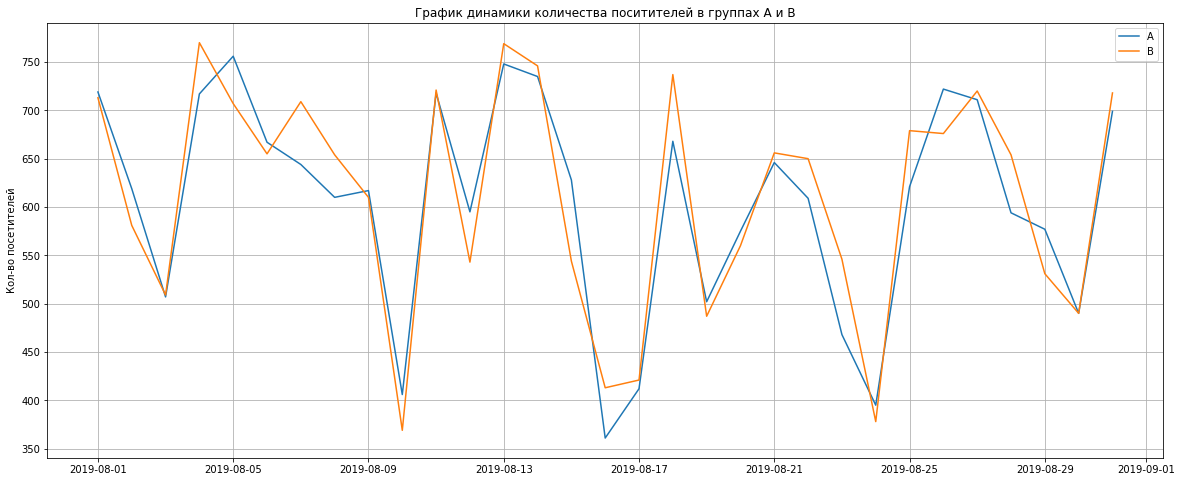

In [158]:
group_a = visitors.query('group == "A"')
group_b = visitors.query('group == "B"')
fig, ax = plt.subplots(figsize=(20, 8))
plt.plot(group_a['date'], group_a['visitors'], label='A')
plt.plot(group_b['date'], group_b['visitors'], label='B')
plt.title('График динамики количества поситителей в группах А и В')
plt.ylabel("Кол-во посетителей")
plt.legend()
plt.grid(True)
plt.show()

В течение месяца количество поситителей многократно колебалось, примечательны резкие спады в середине месяца. В среднем, количество посетителей группы B выше, чем в группе А.

Сначала применим фреймворк ICE (Impact, Confidence, Effort) для приоритизации гипотез.

In [159]:
hypothesis['ice'] = round((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'], 2)

hypothesis[['hypothesis', 'ice']].sort_values(by='ice', ascending=False).head(5)

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.330
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000


Теперь мы видим топ-5 наиболее приоритетных гипотез. Далее добавим к расчету параметр Reach и приоритезируем гипотезы по методу RICE.

In [160]:
hypothesis['rice'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

hypothesis[['hypothesis', 'rice']].sort_values(by='rice', ascending=False).head(5)

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.000
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200


Состав топ-5 гипотез не изменился, однако порядок гипотез в этом рейтинге несколько иной. Это связано с тем, что фреймворк RICE включает Reach, который учитывает количество пользователей, которых затронет изменение, вносимое гипотезой.

**Вывод**: Таким образом, порядок, в котором следует проверять гипотезы зависит от компонентов, из которых состоит фреймворк. Однако, вне зависимости от выбранного метода приоритизации гипотез в топ-3 всегда находятся гипотеза о добавлении формы подписки и гипотеза о добавлении новы, значит на них точно следует обратить внимание.

# Часть 2. Анализ A/B-теста

## Кумулятивные метрики

Теперь настало время проанализировать A/B-тест. Для начала построим график кумулятивной выручки по группам. Нам понадобятся агрегированные кумулятивные данные по дням о заказах.

In [161]:
# создаем массив уникальных пар значений дат и групп теста
dates_grouped = orders[['date', 'group']].drop_duplicates()

# получаем агрегированные кумулятивные данные по дням о заказах 
orders_grouped = dates_grouped.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

orders_grouped.head(5)

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


In [162]:
# получаем агрегированные кумулятивные данные по дням о посетителях 

visitors_grouped = dates_grouped.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max', 
            'group': 'max', 
            'visitors': 'sum'
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitors_grouped.head(5)

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [163]:
# объединяем кумулятивные данные в одной таблице и меняем названия ее столбцов

cumulative_data = orders_grouped.merge(
    visitors_grouped, 
    left_on=['date', 'group'], 
    right_on=['date', 'group']
)

cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulative_data

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


Проверим правильно ли был создан датафрейм cumulative_data. Для этого сравним минимальную и максимальную даты в этом датафрейме с минимальной и максимальной датой в исходных данных.

In [164]:
# минимальная дата 
display(visitors['date'].min())
display(cumulative_data['date'].min())

# максимальная дата 
display(visitors['date'].max())
display(cumulative_data['date'].max())

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

Timestamp('2019-08-31 00:00:00')

In [165]:
# добавим расчетную колонку с конверсией.
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visitors']
cumulative_data.head(6)

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033
1,2019-08-01,B,21,20,101217,713,0.029
2,2019-08-02,A,44,38,242401,1338,0.033
3,2019-08-02,B,45,43,266748,1294,0.035
4,2019-08-03,A,68,62,354874,1845,0.037
5,2019-08-03,B,61,59,380996,1803,0.034


### выручка по группам

Теперь построим график кумулятивной выручки по группам.

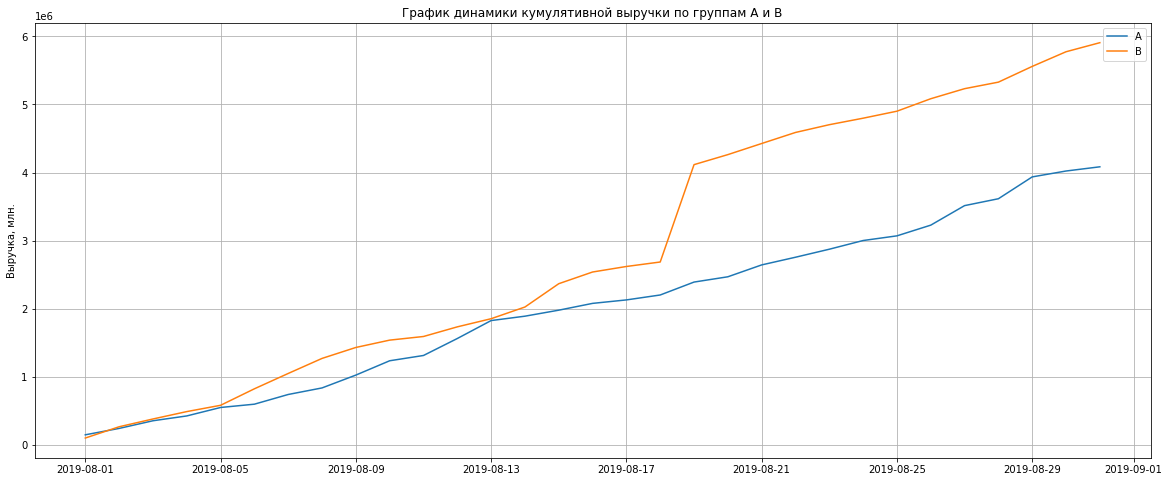

In [166]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]
fig, ax = plt.subplots(figsize=(20, 8))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')
plt.title('График динамики кумулятивной выручки по группам А и В')
plt.ylabel("Выручка, млн.")
plt.legend()
plt.grid(True)
plt.show()

Судя по графику, кумулятивная выручка группы А растет линейно, и примрно с 13 августа выручка группы B значительно превышает выручку группы А.
Также примерно с 18 августа примечателен резкий скачок в группе В, что может гооврить о резком скачке числа заказов, либо о наличии аномально дорогих заказов в выборке.

### средний чек по группам

Построим график динамики кумулятивного среднего чека по группам.

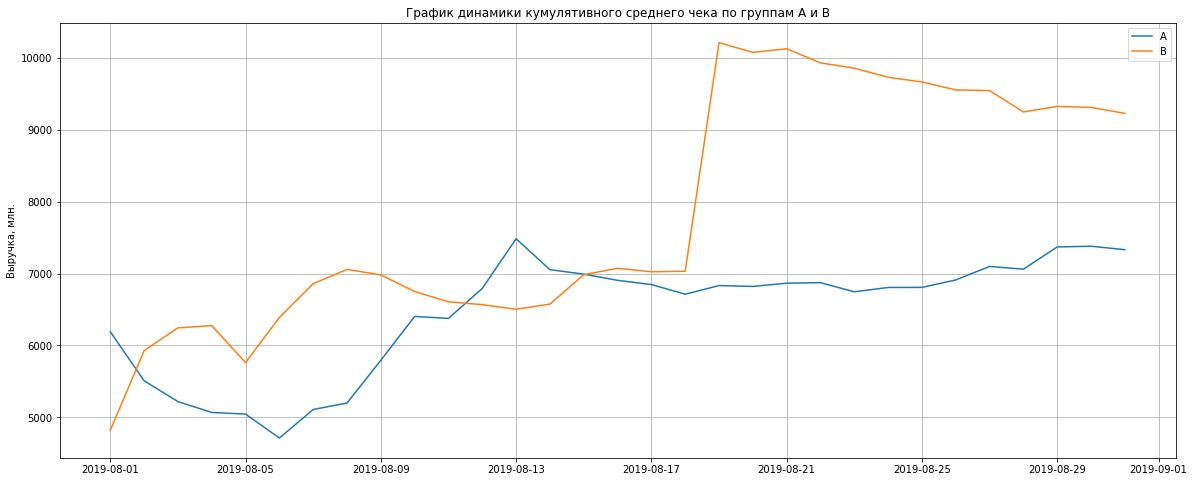

In [167]:
fig, ax = plt.subplots(figsize=(20, 8))
plt.plot(cumulative_revenue_a['date'], 
         cumulative_revenue_a['revenue'] / cumulative_revenue_a['orders'],
         label='A')

plt.plot(cumulative_revenue_b['date'], 
         cumulative_revenue_b['revenue'] / cumulative_revenue_b['orders'], 
         label='B')

plt.title('График динамики кумулятивного среднего чека по группам А и В')
plt.ylabel("Выручка, млн.")
plt.legend()
plt.grid(True)
plt.show()

Из графика видно, что средний чек в группе А стабилизировался после роста. Показатель группы В снова показал резкий рывок в тот же момент времени. Это говорит нам о том, что рост прибыли зависит от аномально дорогих заказов в выборке.

### относительноe изменениe кумулятивного среднего чека группы B к группе A

Теперь исследуем изменение кумулятивного среднего чека группы B по сравнению с группой A.

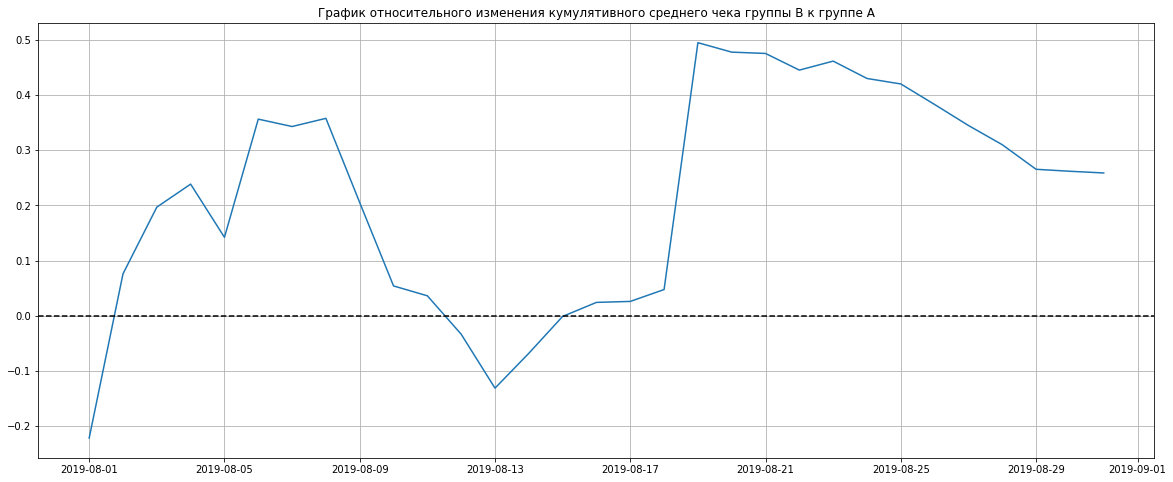

In [168]:
# собираем данные в одном датафрейме
cumulative_revenue_ab = cumulative_revenue_a.merge(
    cumulative_revenue_b, 
    left_on='date', 
    right_on='date', 
    how='left', 
    suffixes=['_a', '_b']
)

# cтроим отношение средних чеков
fig, ax = plt.subplots(figsize=(20, 8))
plt.plot(cumulative_revenue_ab['date'], 
         (
             cumulative_revenue_ab['revenue_b']/cumulative_revenue_ab['orders_b']
         )/
         (
             cumulative_revenue_ab['revenue_a']/cumulative_revenue_ab['orders_a']
         )-1
        )

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.grid(True)
plt.show()

По-прежнему, все говорит о наличии выбросов в данных - снова резкий скачок начиная с 13 августа.

### кумулятивная конверсия по группам

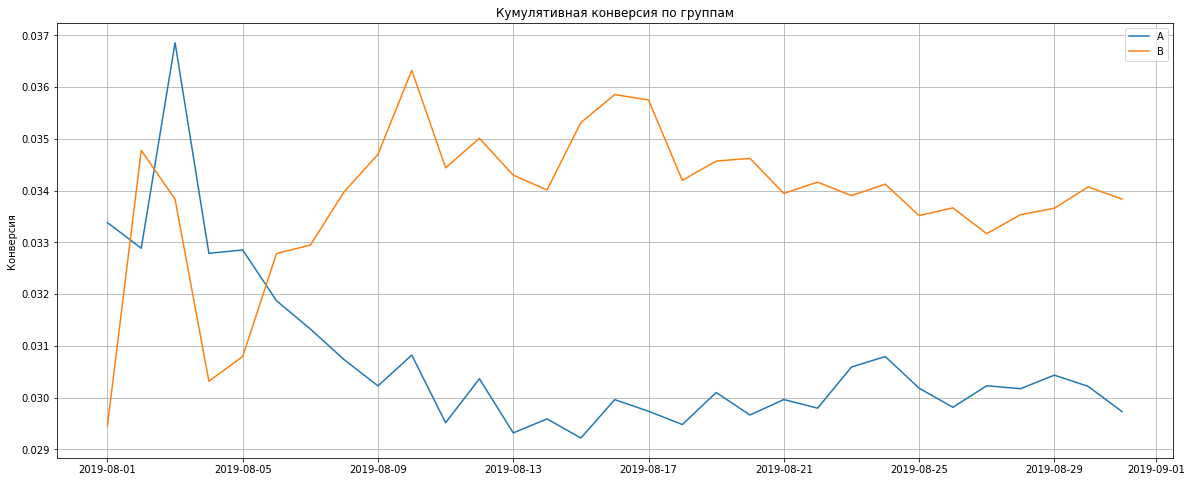

In [169]:
# отделяем данные по группе A
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']

# отделяем данные по группе B
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

# строим графики
fig, ax = plt.subplots(figsize=(20, 8))
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')
plt.legend()
plt.title('Кумулятивная конверсия по группам')
plt.xlabel(' ')
plt.ylabel('Конверсия')
plt.grid(True)
plt.show()

Примерно до 5 августа показатели конверсии обеих групп колебались, однако уже после преодоления этой временной отметки, показатель конверсии группы В превышает показатель группы А.

### относительное изменение кумулятивной конверсии группы B к группе A

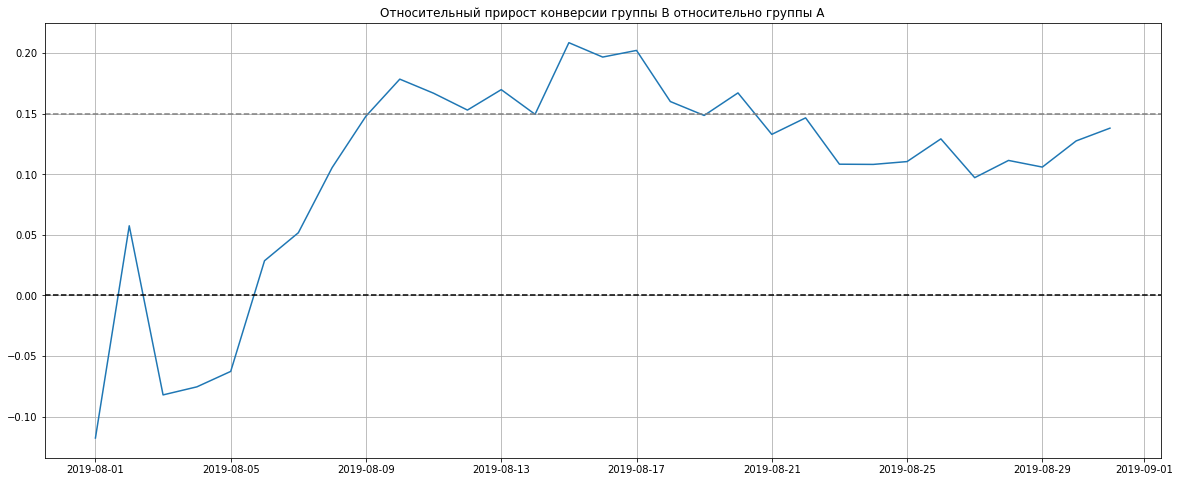

In [170]:
cumulative_conversions_ab = (
    cumulative_data_a[['date','conversion']]
    .merge(
        cumulative_data_b[['date','conversion']], 
        left_on='date', 
        right_on='date', 
        how='left', 
        suffixes=['_a', '_b']
    )
)
fig, ax = plt.subplots(figsize=(20, 8))
plt.plot(
    cumulative_conversions_ab['date'], 
    cumulative_conversions_ab['conversion_b']/
    cumulative_conversions_ab['conversion_a']-1
)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.grid(True)
plt.show()

В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд. Потом её конверсия снова падала, но теперь постепенно растёт.
В целом отношение конверсии ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя. Впрочем, сперва стоит проанализировать аномалии, о которых нам сигнализировали предыдущие графики, возможно, они изменят картину.

### анализ количества заказов по пользователям и их стоимости

Изучим гистограмму распределения количества заказов на одного пользователя.

In [171]:
# таблица с количесвом заказов по идентификаторам пользователей
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
orders_by_users.columns=['user_id', 'orders']

count   1,031.000
mean        1.161
std         0.725
min         1.000
25%         1.000
50%         1.000
75%         1.000
max        11.000
Name: orders, dtype: float64

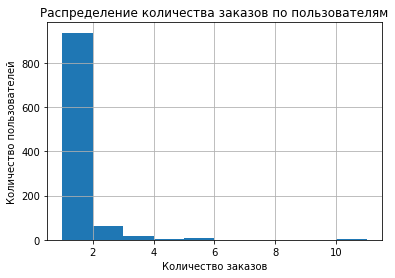

In [172]:
plt.hist(orders_by_users['orders']);
plt.title('Распределение количества заказов по пользователям')
plt.xlabel('Количество заказов')
plt.ylabel('Количество пользователей')
plt.grid(True)

display(orders_by_users['orders'].describe())

Большинство пользователей заказывают только один раз, однако есть и пользователи с 2-3 заказами. Построим точечную диаграмму числа заказов на одного пользователя:

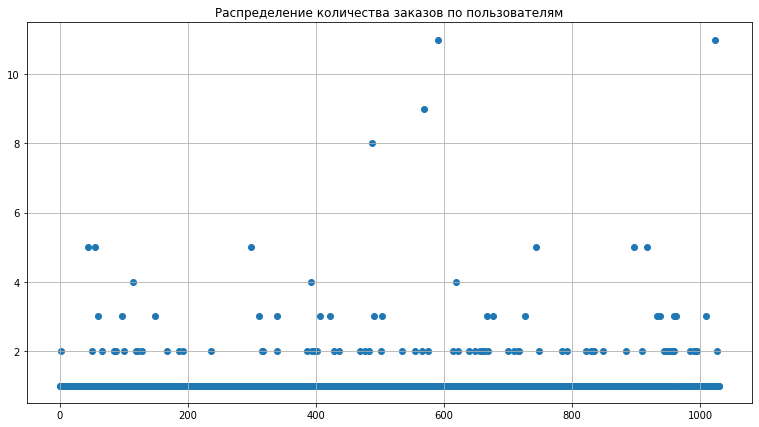

In [173]:
x_values = pd.Series(range(0,len(orders_by_users)))
fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Распределение количества заказов по пользователям')
plt.scatter(x_values, orders_by_users['orders']); 
plt.grid(True)

Пользователей с 2-4 заказами довольно много. Однако их точная доля не ясна — непонятно, считать их аномалиями или нет. Посчитаем выборочные перцентили количества заказов на одного пользователя:

In [174]:
np.percentile(orders_by_users['orders'], [95, 99])

array([2., 4.])

Таким образом, не более 5% пользователей оформляли больше чем 2 заказа и 1% пользователей заказывали более 4 раз. 

Выберем 4 заказа на одного пользователя за верхнюю границу числа заказов, и отсеем аномальных пользователей по ней. 

Теперь изучим гистограмму распределение стоимости заказов.

In [175]:
# выставляем ограничение на показ знаков после запятой
pd.options.display.float_format = '{:,.3f}'.format

count       1,197.000
mean        8,348.006
std        39,191.132
min            50.000
25%         1,220.000
50%         2,978.000
75%         8,290.000
max     1,294,500.000
Name: revenue, dtype: float64

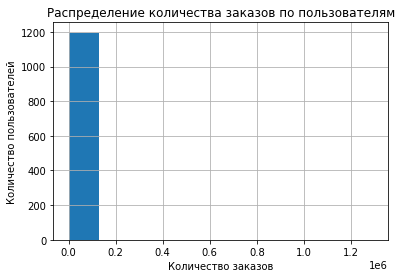

In [176]:
plt.hist(orders['revenue']);
plt.title('Распределение количества заказов по пользователям')
plt.xlabel('Количество заказов')
plt.ylabel('Количество пользователей')
plt.grid(True)
display(orders['revenue'].describe())

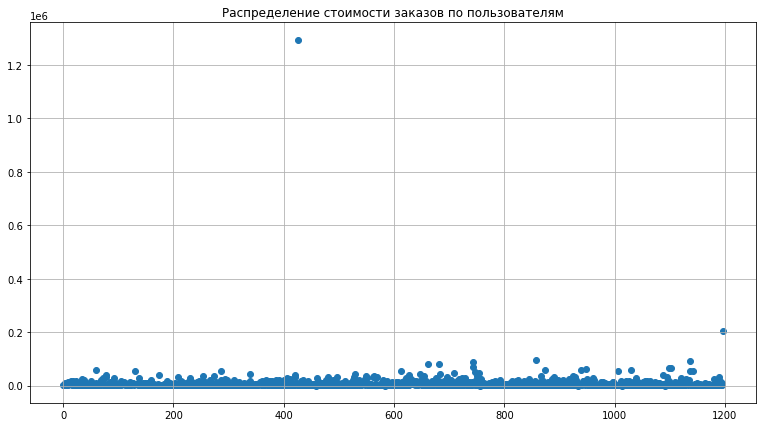

In [177]:
x_values = pd.Series(range(0,len(orders)))
fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Распределение стоимости заказов по пользователям')
plt.scatter(x_values, orders['revenue']); 
plt.grid(True)

В данных есть заказ стоимостью более чем 1.2 млн, который вызвал всплеск на графиках кумулятивных метрик, а также другой заказ, стоимостю примерно равной 200 тыс. Они вполне могли повлиять на результат исследования.

Теперь построим такой же график, но без двух крупных выбросов, которые мы обнаружили выше.

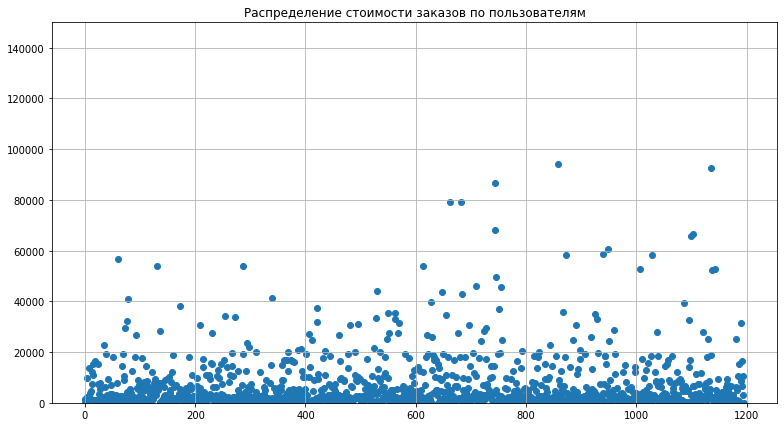

In [178]:
# строим точечную диаграмму
fig, ax = plt.subplots(figsize=(13, 7))
plt.ylim(0, 150000)
plt.scatter(x_values, orders['revenue'])
plt.title('Распределение стоимости заказов по пользователям')
plt.grid(True)
plt.show()

На новом графике стоимость заказов не превышает 100 000. Теперь посчитаем 95-й и 99-й перцентили стоимости заказов на пользователя и выберим границу для определения аномалий.

In [179]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Получается, не более 5% пользователей оформляли заказы не дороже чем 28000 и 1% пользователей заказывали не дороже чем 58233. Установим границу по величине 99% перцентиля - стоимостью 58233.

### Анализ статистической значимости в среднем количестве заказов на посетителя (конверсии) между группами по «сырым» данным.


Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 

Введем основную и альтернативные гипотезы:
- **H0** - различий в конверсиях групп нет
- **H1** - различия в конверсиях групп есть

In [192]:
# сначала подготовим данные
visitors_daily_a = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_daily_a.columns = ['date', 'visitors_per_date_a']

visitors_cummulative_a = visitors_daily_a.apply(
    lambda x: visitors_daily_a[visitors_daily_a['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}
    ),
    axis=1,
)
visitors_cummulative_a.columns = ['date', 'visitors_cummulative_a']

visitors_daily_b = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_daily_b.columns = ['date', 'visitors_per_date_b']

visitors_cummulative_b = visitors_daily_b.apply(
    lambda x: visitors_daily_b[visitors_daily_b['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}
    ),
    axis=1,
)
visitors_cummulative_b.columns = ['date', 'visitors_cummulative_b']

orders_daily_a = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_daily_a.columns = ['date', 'orders_daily_a', 'revenue_per_date_a']

orders_cummulative_a = orders_daily_a.apply(
    lambda x: orders_daily_a[orders_daily_a['date'] <= x['date']].agg(
        {'date': 'max', 'orders_daily_a': 'sum', 'revenue_per_date_a': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

orders_cummulative_a.columns = ['date','orders_cummulative_a','revenue_cummulative_a']

orders_daily_b = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_daily_b.columns = ['date', 'orders_daily_b', 'revenue_per_date_b']

orders_cummulative_b = orders_daily_b.apply(
    lambda x: orders_daily_b[orders_daily_b['date'] <= x['date']].agg(
        {'date': 'max', 'orders_daily_b': 'sum', 'revenue_per_date_b': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

orders_cummulative_b.columns = ['date','orders_cummulative_b','revenue_cummulative_b']

In [181]:
# в  переменных orders_by_users_a и orders_by_users_bдля пользователей, совершивших хотя бы 1 заказ, будет указано число заказов
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_a.columns = ['visitor_id', 'orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_b.columns = ['visitor_id', 'orders']

In [182]:
# в переменных sample_a и sample_b пользователям с заказами будет соответствовать число заказов пользователя. 
# А пользователям без заказов — нули. 
sample_a = pd.concat([orders_by_users_a['orders'],
                      pd.Series(
                          0, 
                          index=np.arange(visitors_daily_a['visitors_per_date_a'].sum() - 
                                          len(orders_by_users_a['orders'])), 
                          name='orders')],axis=0
                    )

sample_b = pd.concat([orders_by_users_b['orders'],
                      pd.Series(
                          0, 
                          index=np.arange(visitors_daily_b['visitors_per_date_b'].sum() - 
                                          len(orders_by_users_b['orders'])), 
                          name='orders')],axis=0
                    )

Так как нам предстоит рассчитать cтатистическую значимость различий сразу по нескольким показателям, создадим функцию, в которой используем критерий Манна-Уитни (так как данные скорее всего содержат выбросы), указав уровень статистической значимости (alpha=0.05) и форматирование.

In [183]:
# Функция для проверки гипотезы о равенстве групп data A и data B
def stat_significance(data_a, data_b):
    alpha = 0.05
    p_value = st.mannwhitneyu(data_a, data_b)[1]
    print("P-value: {0:.3f}".format(p_value))

    if (p_value < alpha):
        print("Отвергаем нулевую гипотезу: между группами есть разница")
    else:
        print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными")
    
    print("Относительный прирост В к А: {0:.3%}".format(data_b.mean() / data_a.mean()-1))

In [184]:
stat_significance(sample_a, sample_b)

P-value: 0.017
Отвергаем нулевую гипотезу: между группами есть разница
Относительный прирост В к А: 13.808%


P-value = 0.017, что меньше 0.05. Значит, нулевую гипотезу об отсутствии различий стоит отвергнуть. Относительный выигрыш группы B равен 13.81%

### Анализ статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

Теперь посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 

Введем основную и альтернативные гипотезы:
- **H0** - различий в среднем чеке заказа между группами нет
- **H1** - различия в среднем чеке заказа между группами есть

In [185]:
stat_significance(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])

P-value: 0.729
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными
Относительный прирост В к А: 25.871%


Так как p-value значительно больше 0.05, то считать, что в среднем чеке есть различия, нельзя. Также мы выяснили, что средний чек группы B значительно выше среднего чека группы A, примерно на 26%. Отсюда следует, что наблюдаемые различия не являются значимыми при таком уровне значимости, а следовательно были получены случайно.

###  Анализ статистической значимости различий в среднем количестве заказов на посетителя (конверсии) между группами по «очищенным» данным.

Ранее мы приняли за "аномальных" пользователей с более, чем 4 заказами и стоимостью дороже 58233. Теперь "очистим" данные - сделаем срез данных по 99 процентилю.

In [186]:
# 4
many_orders = np.percentile(orders_by_users['orders'], 99) 
# 58233
expensive_orders = np.percentile(orders['revenue'], 99) 

In [187]:
# сделаем срез по значениям "аномальных" пользователей
users_with_many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > many_orders]['visitor_id'],
        orders_by_users_b[orders_by_users_b['orders'] > many_orders]['visitor_id'],
    ],
    axis=0,
)
users_with_expensive_orders = orders[orders['revenue'] > expensive_orders]['visitor_id']

In [188]:
# Объединим срезы в таблице abnormalUsers
abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(abnormal_users.head(5))
display(abnormal_users.shape[0]) 

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
Name: visitor_id, dtype: int64

15

Всего 15 аномальных пользователей. 
Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [189]:
sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [190]:
stat_significance(sample_a_filtered, sample_b_filtered)

P-value: 0.014
Отвергаем нулевую гипотезу: между группами есть разница
Относительный прирост В к А: 15.331%


По очищенным данным разница в конверсии между группами действительно есть, а относительный прирост конверсии группы В относительно группы А выше на 15.3%.

### Анализ статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным.

Теперь узнаем, произошло ли что-нибудь с результатами по среднему чеку.

In [191]:
stat_significance(
    orders[(orders['group']=='A') & np.logical_not(orders['visitor_id'].isin(abnormal_users))]['revenue'], 
    orders[(orders['group']=='B') & np.logical_not(orders['visitor_id'].isin(abnormal_users))]['revenue']
                  )

P-value: 0.851
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными
Относительный прирост В к А: -0.575%


P-value увеличился до 0.851, но и разница между сегментами сократилась до -0.575%. Получается, что оснований считать группы разными нет.

# Выводы

На основании проведенного анализа, можно сделать следующие выводы и рекоммендации, изложенные ниже:

**Часть 1. Приоритезация гипотез**
1. По части приоритезации гипотез из списка, предоставленных отделом Маркетинга следует в первую очередь обратить внимание на гипотезы:
- "Запустить акцию, дающую скидку на товар в день рождения";
- "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей";
- "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

2. Если приоритизация гипотез включает в себя охват пользователей интернет-магазина, то гипотезы следует распределить таким образом:
- "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок";
- "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа";
- "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей".

**Часть 2. Анализ A/B-теста**
Проведя исследование различий по показателям коверсии и среднего чека групп А и B, можно сделать следующие выводы:

- Существует статистически значимое различие по конверсии между группами как по «сырым», так и по данным после фильтрации аномалий. Конверсия группы В выше, чем в группе А, на 13-15%;

- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий. При этом средний чек группы В выше (на "очищенных" данных - примерно на 2%);

- График относительного изменения кумулятивной конверсии группы B к группе A показывает, что результаты группы В стабильно лучше группы А;

На основании вышеизложенного рекомендуем **остановить тест**, зафиксировав победу группы B (ее конверсия значительно выше конверсии группы А).